In [17]:
from lib import plot
import IPython
import numpy as np

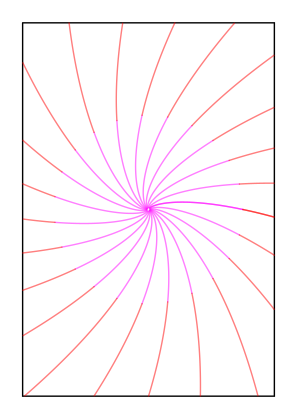

In [18]:
a = plot.A6_PORTRAIT
p_svg = plot.SVGPlotter('plots/ode.svg', a)
p_hpgl = plot.HPGLPlotter(a, 'plots/ode_{index}.hpgl')
p = plot.MultiPlotter()
p.register_plotter(p_svg)
p.register_plotter(p_hpgl)

p.move_to(a.bottom_left())
p.line_to(a.bottom_right())
p.line_to(a.top_right())
p.line_to(a.top_left())
p.line_to(a.bottom_left())

A = np.array([[-0.4, -0.2], [0.1, -0.3]])
A = np.random.normal(size=(2, 2))

def plot_ode(A):
    dia = np.min(a.size()) * 0.75
    # step_size = 0.01 / np.max(np.abs(np.linalg.eig(A)[0]))

    states = np.linspace(0, 2 * np.pi, 24)
    states = np.vstack([np.cos(states), np.sin(states)])
    for s in states.T:
        p.move_to(s * dia / 2 + a.centre())
        for _ in range(100000):
            step = A @ s
            step *= (0.5 / dia) / np.linalg.norm(step)
            s = step + s
            n = s * dia / 2 + a.centre()
            if not a.is_within(n):
                break
            if np.linalg.norm(s * dia / 2) < 0.5:
                break
            p.line_to(n)

p.add_layer([1, 0, 1, 0.5])
plot_ode(A)
p.add_layer([1, 0, 0, 0.5])
plot_ode(-A)
# A = np.linalg.inv(A)
# plot_ode(A)
# plot_ode(-A)

p.finalise()

IPython.display.SVG(filename=p_svg.file_name)